In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [3]:
def k_reward(x,k=0.95):
    x = (x-0.1)/0.9
    y = (x-k*x)/(k-2*k*np.abs(x)+1)
    reward = y*0.9 +0.1
    return reward

def enp_reward(x, bth=0.8):
    return np.where(x >= bth, 1,(x-0.1)/(bth-0.1))
    


# a1 = k_reward(conformity,0.5)
# a1 = k_reward(conformity,0.5)

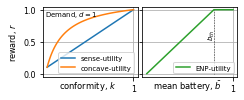

In [20]:
single_column_figure_width = 3.487
double_column_figure_width = 7

fig_width = single_column_figure_width
fig_height = fig_width / 1.618 *0.6

fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=[fig_width,fig_height], # in inches
                        sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.05)

task_ax = axs[0]
enp_ax = axs[1]
# task_ax = axs

conformity = np.linspace(0.1,1,100)
for k in [0,-0.7]:
    r = k_reward(conformity,k)
    task_ax.plot(conformity,r, )

enp_r = enp_reward(conformity)
enp_ax.plot(conformity,enp_r,color="tab:green", label="ENP-utility" )
enp_ax.vlines(x=0.8, ymin=0, ymax=1, colors="k", linestyles='--', linewidth = 0.5)
enp_ax.text(0.73,0.6, r'$b_{th}$', size='x-small', ha='center', va='center', 
            rotation='vertical',  transform=enp_ax.transAxes)
enp_ax.legend(fontsize='x-small',loc = "lower right")

enp_ax.text(0.47,-0.12, 
            r'mean battery, $\bar{b}$', 
            size='small', 
            ha='center', va='center', 
            transform=enp_ax.transAxes)
enp_ax.set_xticks([1])
enp_ax.grid(True)


task_ax.text(0.3,0.9, r'Demand, $d = 1$', 
             size='x-small', ha='center', va='center', 
             transform=task_ax.transAxes)

task_ax.text(0.47,-0.12, 
            r'conformity, $k$', 
            size='small', 
            ha='center', va='center', 
            transform=task_ax.transAxes)
task_ax.set_ylabel(r"reward, $r$")
task_ax.set_xticks([1])

labels = [r'sense-utility', r'concave-utility']
task_ax.legend(labels,fontsize='x-small',loc = "lower right")
task_ax.grid(True)
fig.savefig('./figures/reward_fns.png', dpi=300, bbox_inches='tight', transparent=True)